## Design of Experiments (Method-focused)

Purpose: validate maximal continuous reasons and anti-reasons on a representative subset of UCR univariate time-series datasets, using our distributed method.

- Selection source: the dataset notebook builds `results/doe_selection.csv`, stratified by EU complexity (simple/middle/hard). This notebook reuses that file; it does not re-derive or tabulate dataset properties here.
- Inclusion criteria: EU metrics present in `forest_report.json`; fixed train/test splits; reasonable class balance; preference for datasets with existing result archives in `results/` to accelerate verification.
- Cohorts: simple (lowest eu_complexity), middle (around the median), hard (highest eu_complexity); balanced sample sizes subject to availability.
- Model setup: Random Forest (50 trees) trained per dataset (or reused), endpoints universe (EU) extracted from internal thresholds.
- Method: compute reasons via distributed workers coordinated by a key–value store; prune via ICF and profile domination; confirm maximality by attempted left/right feature extensions.
- Validation outcomes: for each dataset, persist reason/anti-reason artifacts and profiles (GP/BP/AP), and logs for reproducibility; aggregate metrics are summarized in the dataset notebook only.
- Compute considerations: prefer workers collocated with the key–value store to minimize latency; 4–8 host workers recommended; remote workers optional when horizontally scaling.


# Results archive inspection

This notebook automatically inspects every `.zip` file stored in the `results` directory.
It parses the filename of each archive to extract useful metadata, relies on the included
`manifest.json` file to map Redis database dumps to their logical meaning, and previews
all extracted files directly below. Large files are truncated to the first bytes so the
notebook stays responsive.

Available ZIP archives:
[0] Coffee_0_false_0.zip
[1] ECG200_-1_false_0.zip
[2] HandOutlines_0_false_0.zip
[3] MelbournePedestrian_1_false_0.zip
[4] MiddlePhalanxOutlineCorrect_0_false_0.zip
[5] SonyAIBORobotSurface1_1_false_0.zip
[6] Wine_1_false_0.zip
Current selection: [0] Coffee_0_false_0.zip
Report built for 32 workers.
Detailed results per worker:
Worker iteration details are not available for the current selection.


,Worker,Records,Iteration min,Iteration max,Queue min,Queue mean,Queue max,Candidate anti-reasons queue min,Candidate anti-reasons queue mean,Candidate anti-reasons queue max,Total hours,Candidate anti-reasons hours,Candidate reasons hours
0,W01,185,1,185,1.0,6598.335135,12386.0,0.0,2161.556757,3534.0,7.900076,3.636404,3.593055
1,W02,86,1,86,1.0,2792.651163,4934.0,0.0,1096.651163,2259.0,6.792028,0.130733,6.466567
2,W03,329,1,329,1.0,10310.376900,19893.0,0.0,1625.331307,1935.0,20.082588,4.646848,14.591074
3,W04,93,1,93,1.0,3168.387097,5544.0,0.0,1000.354839,2357.0,12.543415,0.234076,12.097474
4,W05,295,1,295,1.0,8888.813559,17730.0,0.0,2760.101695,4269.0,20.107726,18.563732,0.502938
5,W06,149,1,149,1.0,4983.906040,9050.0,0.0,1995.644295,3399.0,6.040545,2.371383,3.150228
6,W07,189,1,189,1.0,6141.555556,12106.0,0.0,2351.306878,3683.0,12.138788,5.178614,6.273819
7,W08,199,1,199,1.0,6378.663317,12170.0,0.0,2382.291457,3631.0,20.277934,6.374591,13.213425
8,W09,234,1,234,1.0,7504.576923,14865.0,1.0,1822.547009,2162.0,20.341095,2.605556,17.070143
9,W10,292,1,292,1.0,9444.681507,18716.0,1.0,2881.438356,4016.0,20.195204,16.868745,2.229710


,Worker,Candidate reasons result: Bad,Candidate reasons result: Good,Candidate anti-reasons result: Confirmed,Candidate anti-reasons result: Not,Outcome: Bad (True),Outcome: Candidate anti-reasons Confirmed Anti-reasons (True),Outcome: Candidate anti-reasons Not Anti-reasons (True),Outcome: Good (True),Outcome: Preferred reasons Removed All Filtered (True),...,Candidate anti-reasons raw info Deleted From CAR,Candidate reasons extensions Added,Candidate reasons extensions Filtered,Candidate reasons extensions Total,Candidate anti-reasons extensions Added,Candidate anti-reasons extensions Filtered,Candidate anti-reasons extensions Filtered By Ap,Candidate anti-reasons extensions Filtered By Ar,Candidate anti-reasons extensions Filtered By R Sharing,Candidate anti-reasons extensions Total
0,W01,3,182,58,118,3,58,118,182,0,...,1729,12604,6824,19428,3707,2179,2121,0,58,5886
1,W02,0,86,33,45,0,33,45,86,0,...,337,5053,3742,8795,2333,1177,1144,0,33,3510
2,W03,3,326,34,288,3,34,288,326,0,...,325,20263,12208,32471,2221,1299,1190,75,34,3520
3,W04,0,93,36,52,0,36,52,93,0,...,806,5673,3711,9384,2499,1203,1167,0,36,3702
4,W05,3,292,75,216,3,75,216,292,0,...,2905,18085,12158,30243,4540,2943,2868,0,75,7483
5,W06,1,148,55,91,1,55,91,148,0,...,1099,9232,6002,15234,3592,1935,1880,0,55,5527
6,W07,2,187,58,129,2,58,129,187,0,...,1110,12339,5892,18231,3852,2126,2068,0,58,5978
7,W08,5,194,61,137,5,61,137,194,3,...,862,12359,7703,20062,3814,2319,2250,8,61,6133
8,W09,5,229,35,199,5,35,199,229,4,...,410,15169,8643,23812,2361,1320,1177,108,35,3681
9,W10,4,288,72,220,4,72,220,288,1,...,1246,19060,10506,29566,4288,2830,2755,3,72,7118


""


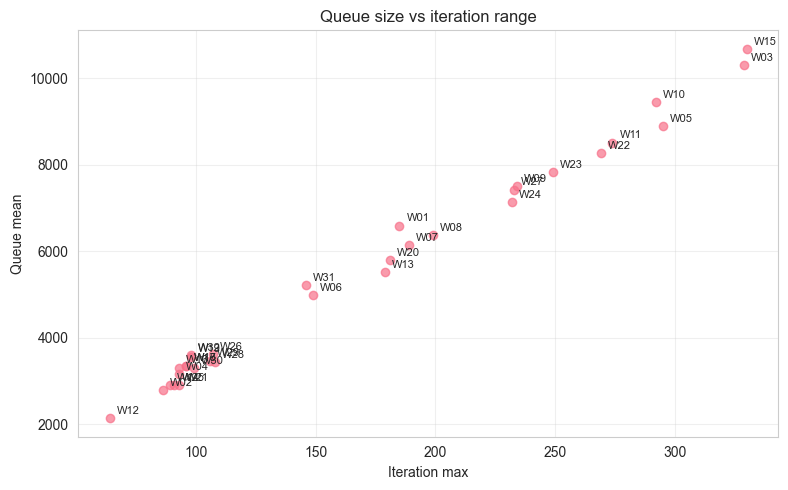

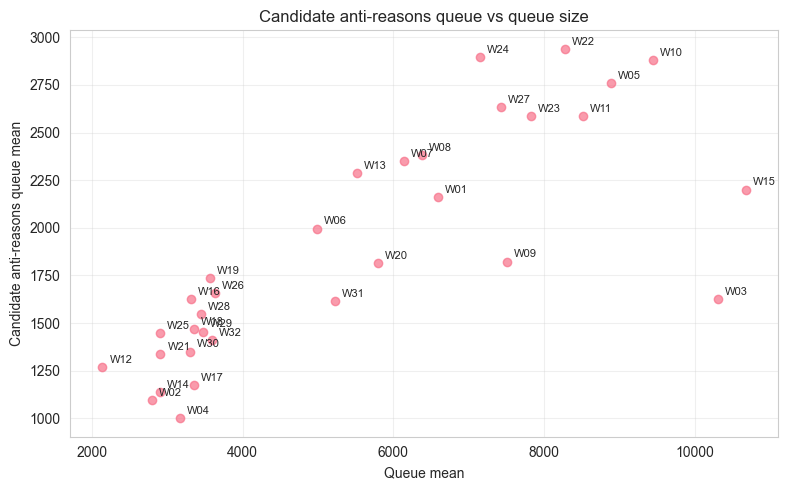

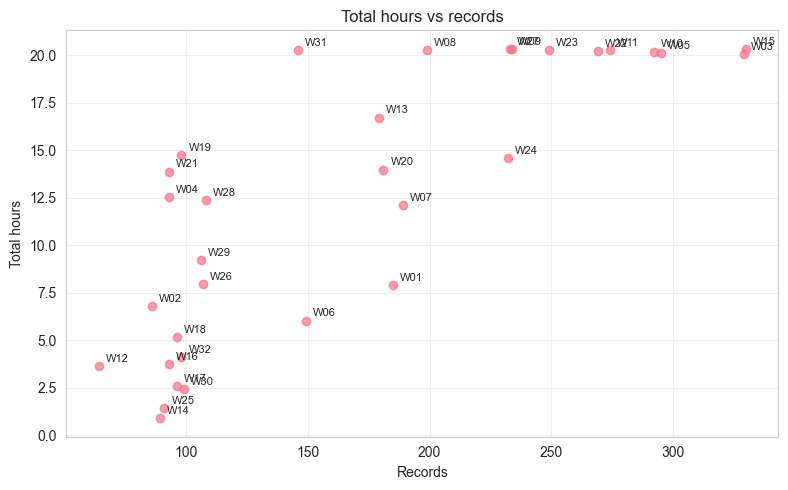

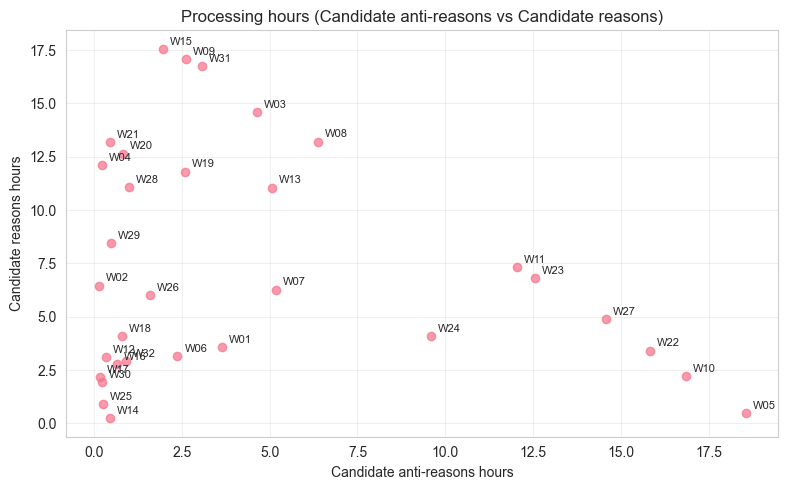

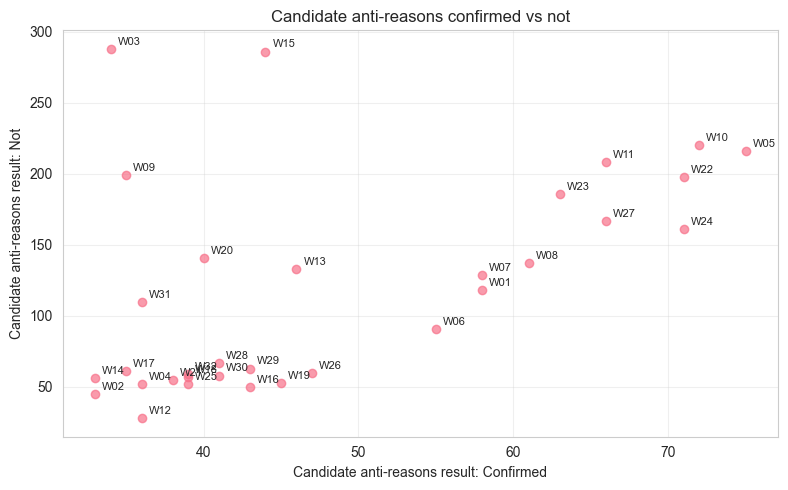

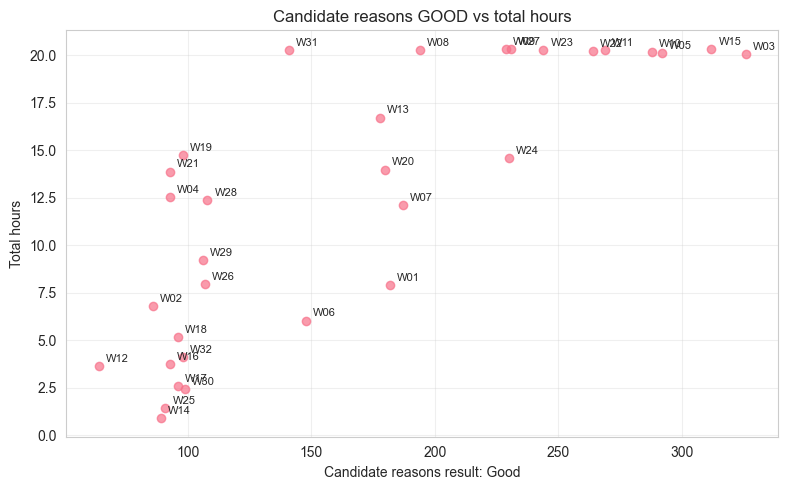

<Figure size 1600x500 with 0 Axes>

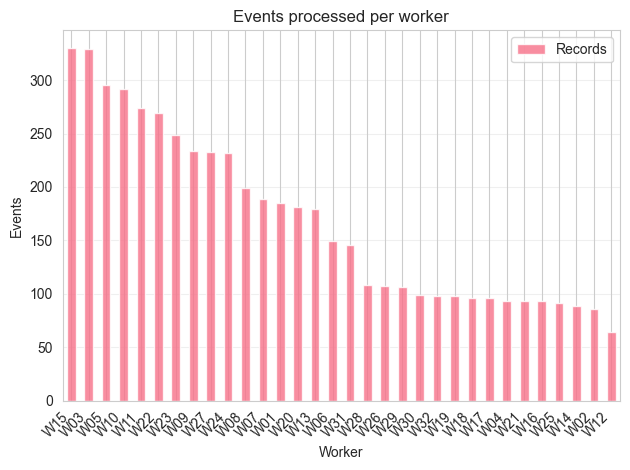

<Figure size 1600x500 with 0 Axes>

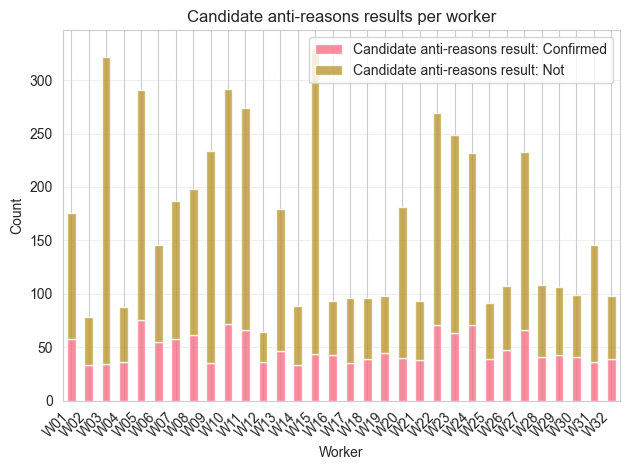

<Figure size 1600x500 with 0 Axes>

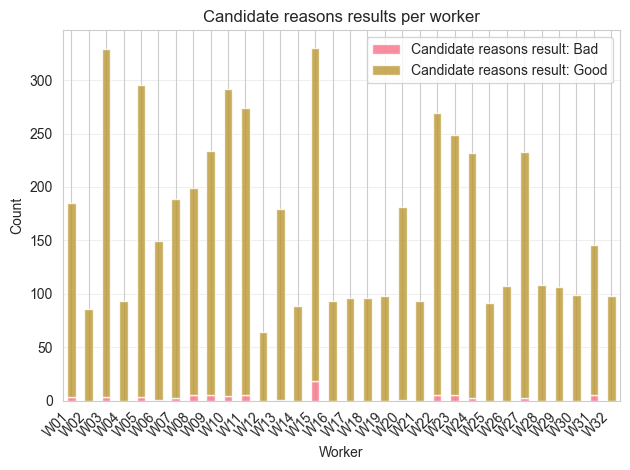

<Figure size 1600x500 with 0 Axes>

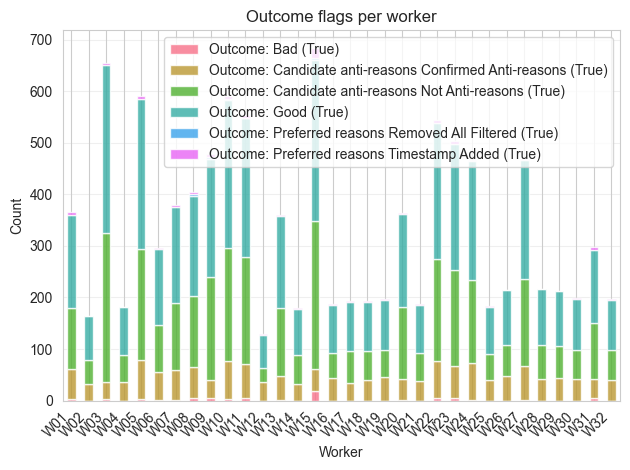

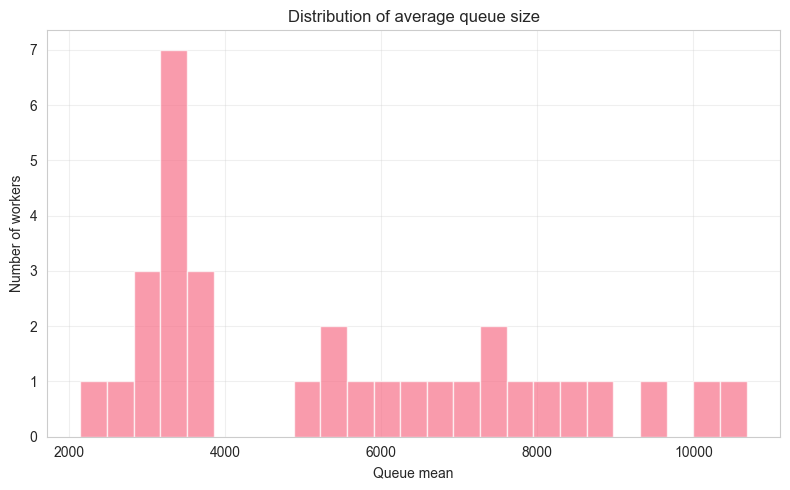

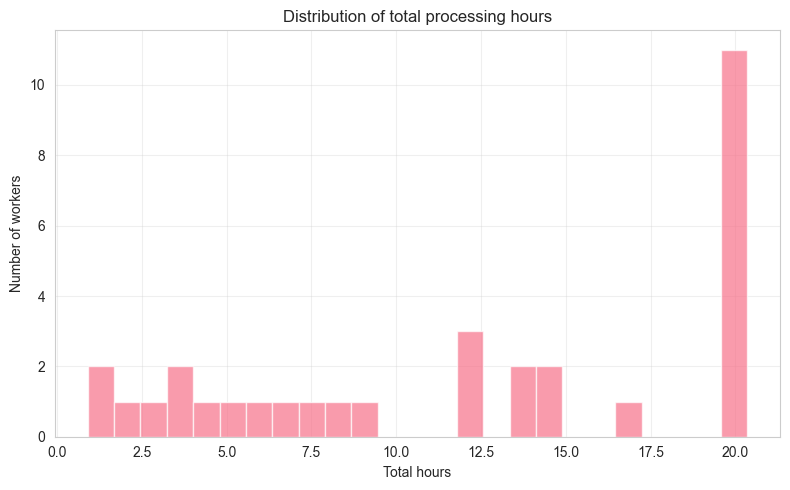

<Figure size 1600x500 with 0 Axes>

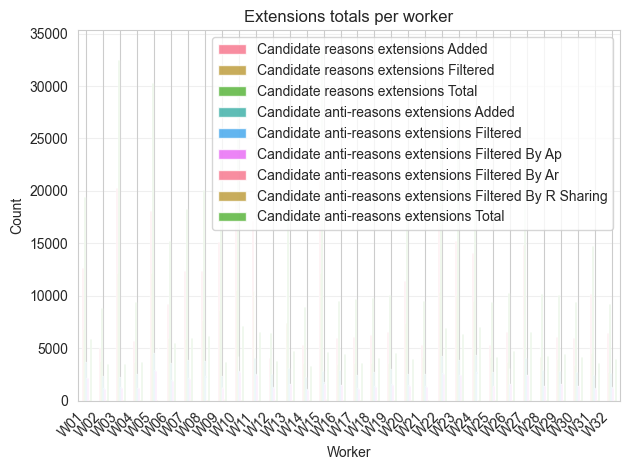

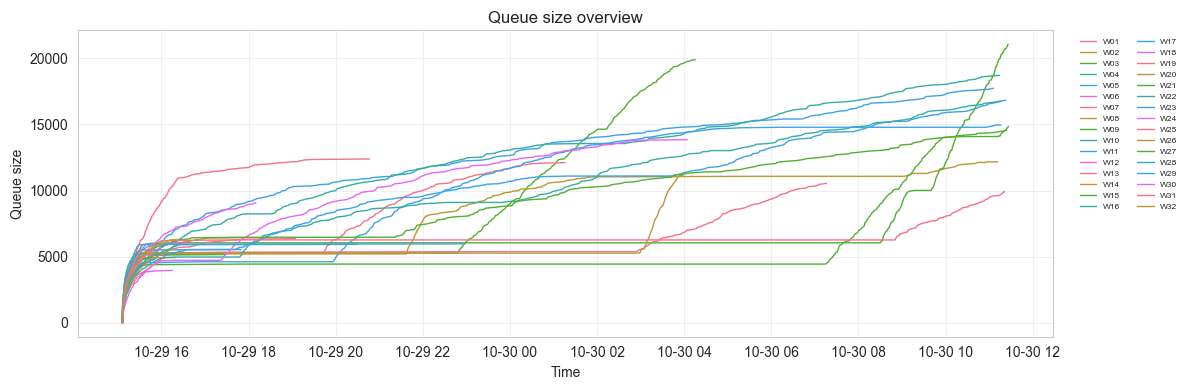

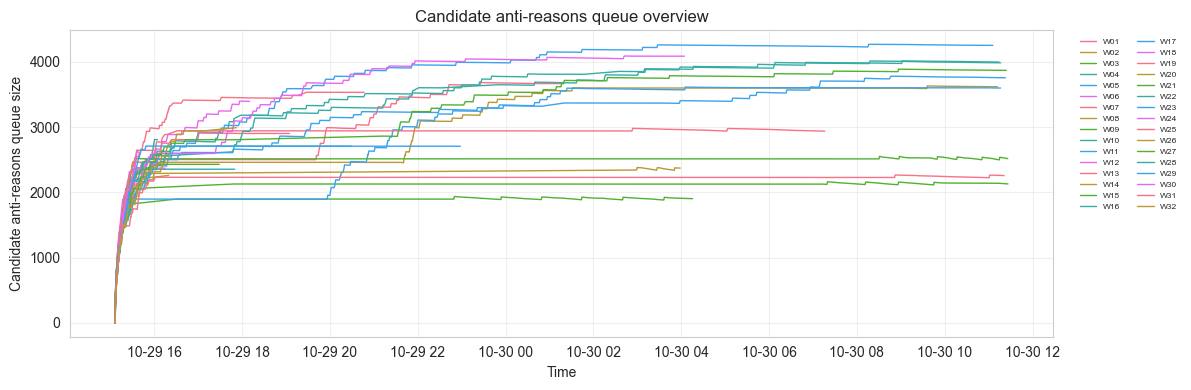

In [1]:
from pathlib import Path
from etl.loader import etl
from etl.data_loader import render_db0_sample_timeseries
from etl.logs_loader import render_bitmap_heatmaps, render_db0_eu_analysis

RESULTS_DIR = Path("results")
zip_paths = sorted(RESULTS_DIR.glob("*.zip"))
db, workers_table, workers_table2, workers_table3, plots = etl(zip_paths, RESULTS_DIR)

display(workers_table)
display(workers_table2)
display(workers_table3)

In [2]:
from cost_function import cal_sigmas
eu = db["data"]['EU']['value_json']
training_set = db["data"]["TRAINING_SET"]["value_json"]
X_train = training_set["X_train"]
feature_names = training_set["feature_names"]

tests_sample = {}
X_test = []
test_ids = []


prefix = "sample_"
suffix = "_meta"

for raw_k, v in db["data"].items():
	if isinstance(raw_k, str) and raw_k.startswith(prefix) and raw_k.endswith(suffix):
		sample_id = raw_k[len(prefix):-len(suffix)]
		meta = v["value_json"]

		tests_sample[sample_id] = {
			**meta,
			"features": meta["sample_dict"]
		}

		X_test.append(meta["sample_dict"])
		test_ids.append(sample_id)


sigmas_all = cal_sigmas(X_train, X_test, feature_names, test_ids=test_ids)

for sid in test_ids:
	tests_sample[sid]["sigmas"] = sigmas_all[sid]

In [3]:
from cost_function import cost_function
from icf_eu_encoding import analyze_bitmap_mask

r = "reasons"
r = "non_reasons"
r = "anti_reasons"

# I have to use tests_sample
for k in db[r].keys():
	bitmap_mask = [int(x) for x in k]
	icf = analyze_bitmap_mask(bitmap_mask, eu)#eu: Dict[str, List[float]]
	c = cost_function(tests_sample, sigmas=sigmas_all, icf=icf, sample_index=index, verbose=True)


NameError: name 'sample_dict' is not defined

In [ ]:
for icf in lista_ar:
	c = cost_function(sample_dict, sigmas=sigmas_all, icf=icf, sample_index=index, verbose=True)
	print(f"Sample {index} Cost: {c}")

	pot_rob[index] = {'cost': c, 'icf':icf}
robustness = max(pot_rob[index]['cost'])



In [7]:
'''
list_sample_radis = []
for i in range(len(X_test)):
	sample= db.get_metadata(i)
	list.append((sample_dict, test_index))

lista_ar = [ar.bitmpaToICF() for ar in DB ]
from cost_function import cost_function
pot_rob = {}
for (sample_dict, index) in list_sample_radis:
	for icf in lista_ar:
		c = cost_function(sample_dict, sigmas=sigmas_all, icf=icf, sample_index=index, verbose=True)
		print(f"Sample {index} Cost: {c}")

		pot_rob[index] = {'cost': c, 'icf':icf}
	robustness = max(pot_rob[index]['cost'])

'''


'\nlist_sample_radis = []\nfor i in range(len(X_test)):\n\tsample= db.get_metadata(i)\n\tlist.append((sample_dict, test_index))\n\nlista_ar = [ar.bitmpaToICF() for ar in DB ]\nfrom cost_function import cost_function\npot_rob = {}\nfor (sample_dict, index) in list_sample_radis:\n\tfor icf in lista_ar:\n\t\tc = cost_function(sample_dict, sigmas=sigmas_all, icf=icf, sample_index=index, verbose=True)\n\t\tprint(f"Sample {index} Cost: {c}")\n\n\t\tpot_rob[index] = {\'cost\': c, \'icf\':icf}\n\trobustness = max(pot_rob[index][\'cost\'])\n\n'

DB 0 EU summary:
  features: 114
  min length: 3
  max length: 8
  average length: 4.00
  length std dev: 1.21
  finite values min: 3
  finite values max: 8
  finite values avg: 4.00
  mean across features: 0.3608


,Feature,Length,Finite samples,Mean,Std dev,Min,Max
0,t_010,3,3,-0.875298,0.0,-0.875298,-0.875298
1,t_017,3,3,-0.978542,0.0,-0.978542,-0.978542
2,t_020,3,3,-0.999575,0.0,-0.999575,-0.999575
3,t_021,3,3,-1.024314,0.0,-1.024314,-1.024314
4,t_022,3,3,-1.047081,0.0,-1.047081,-1.047081
...,...,...,...,...,...,...,...
109,t_249,3,3,-1.210843,0.0,-1.210843,-1.210843
110,t_256,3,3,-1.591216,0.0,-1.591216,-1.591216
111,t_259,3,3,-1.743711,0.0,-1.743711,-1.743711
112,t_266,3,3,-1.872793,0.0,-1.872793,-1.872793


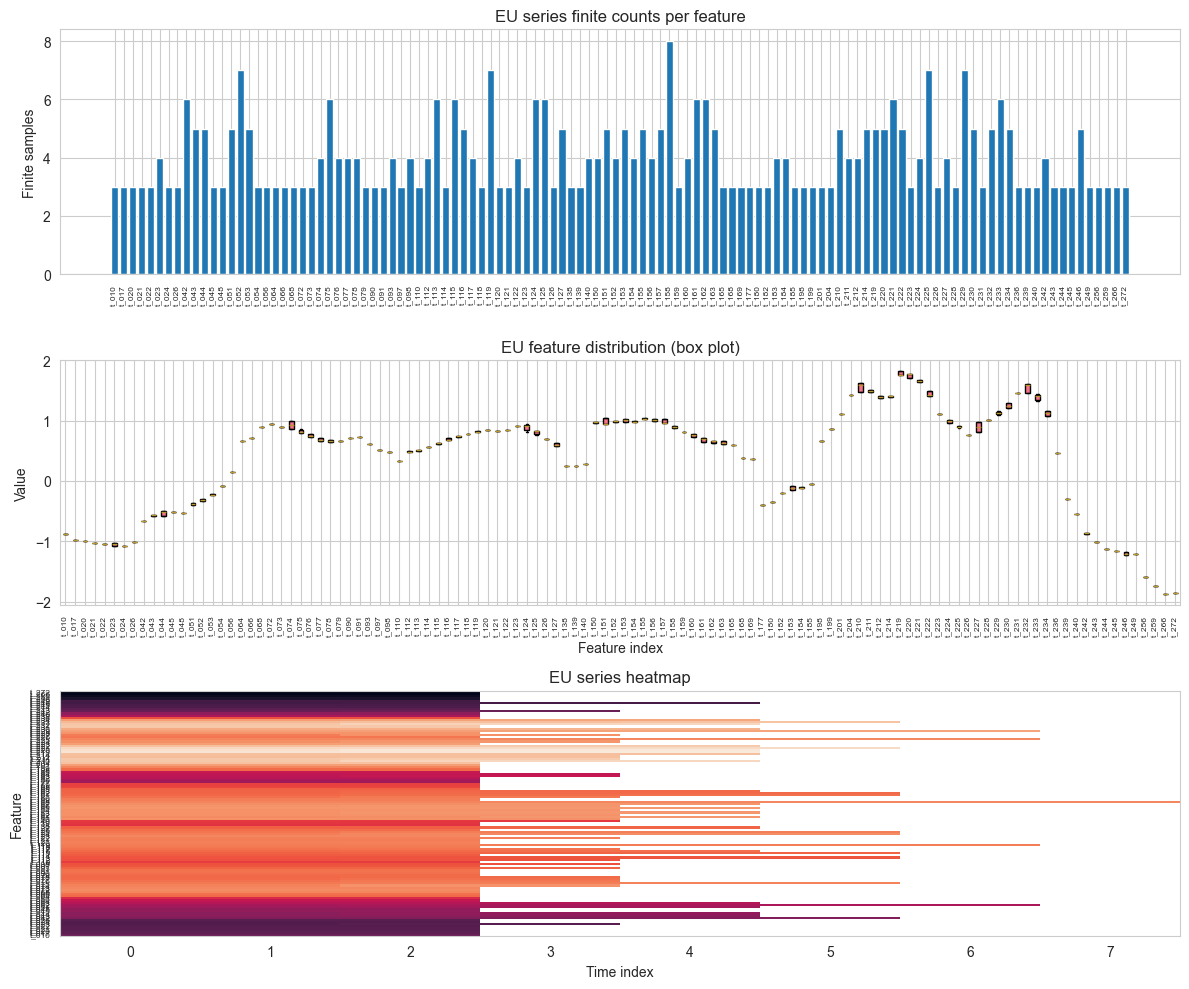

In [8]:
render_db0_eu_analysis(db["data"])

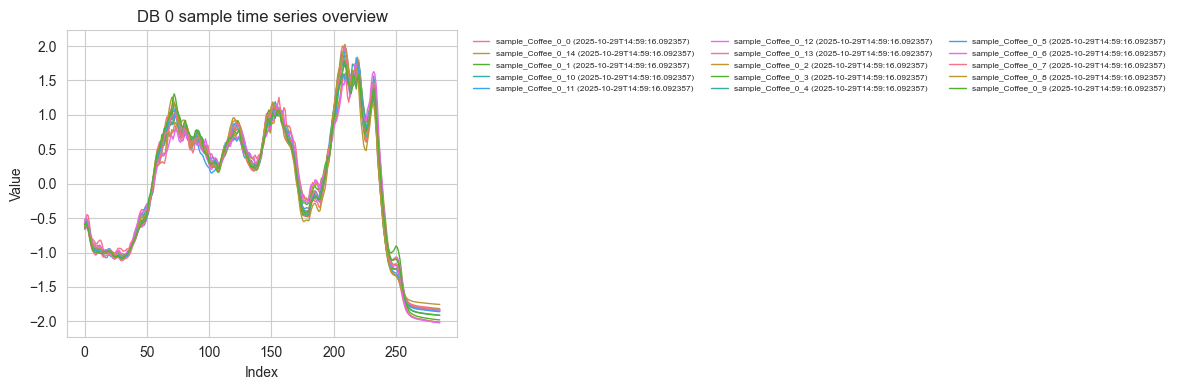

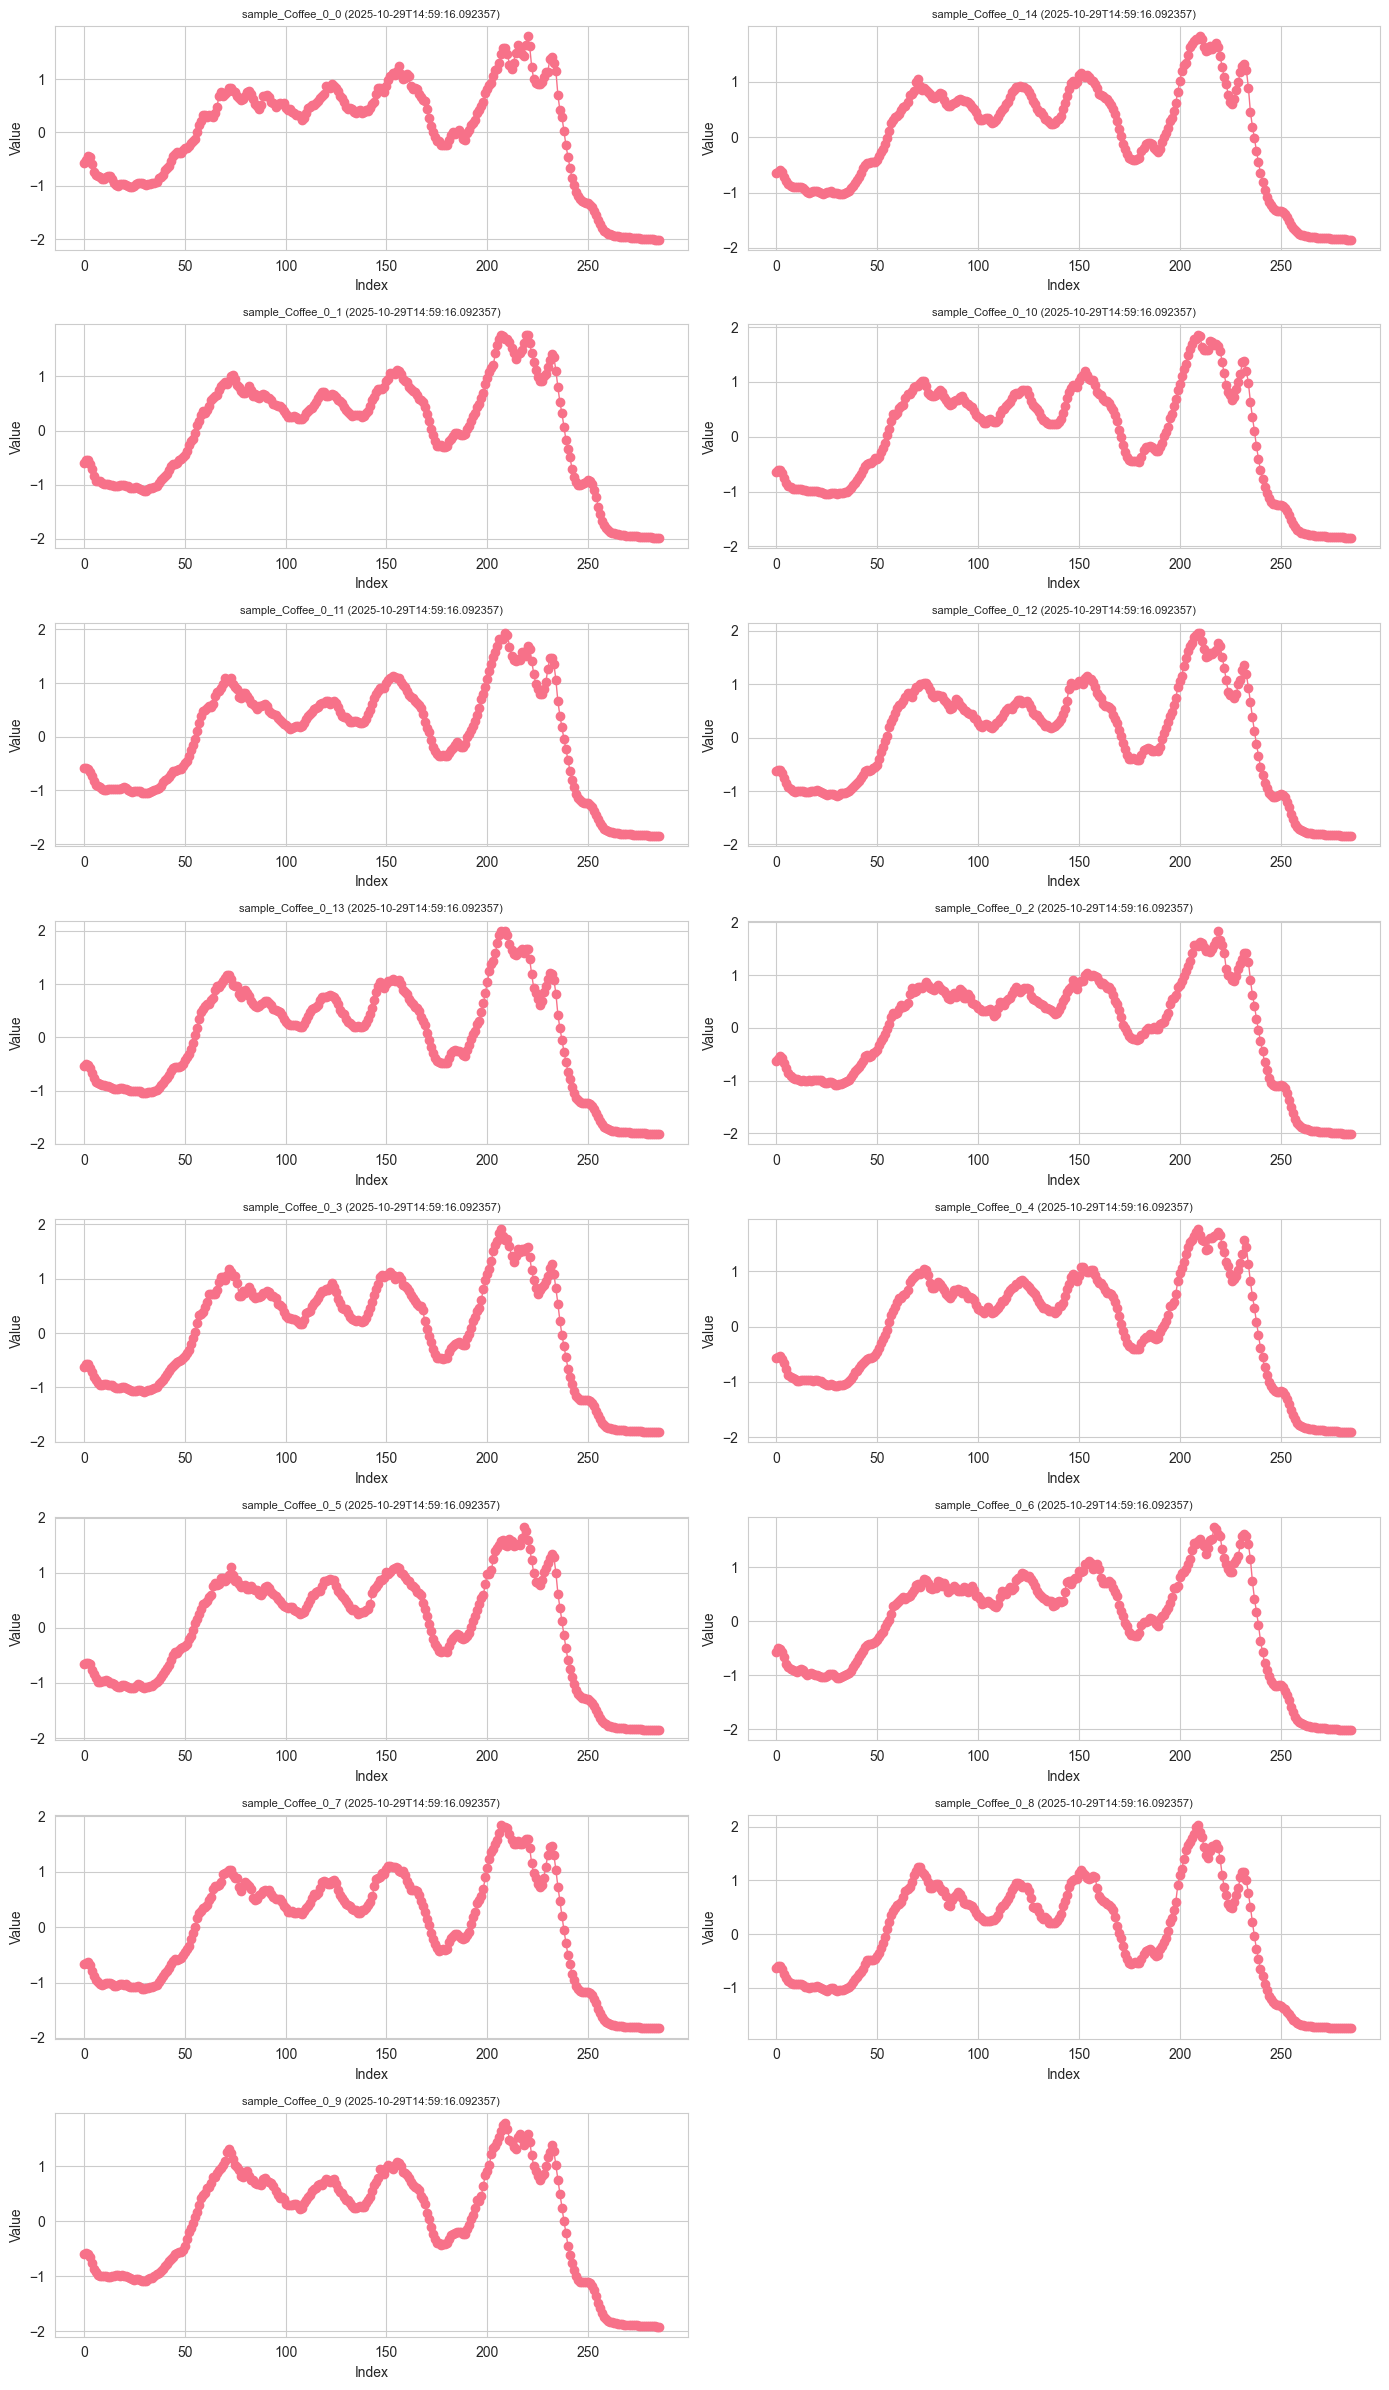

In [9]:
render_db0_sample_timeseries(db["data"])

In [10]:
render_bitmap_heatmaps(selected_manifest, selected_backups)

NameError: name 'selected_manifest' is not defined